In [1]:
%run Util.ipynb

## Testing the correctness of definitions

In [2]:
p, vals = posterior_pmf(10, 100, full_return=True)
print(p, vals)

print(sum((i[0] for i in vals)), sum((i[1] for i in vals)))
print(posterior_pmf(10, 100))
vals

0.0546875 [[0.0009765625, 0.00023501769211176082], [0.00976562500000001, 0.003531140824001966], [0.04394531249999999, 0.023629452603804446], [0.11718750000000014, 0.09397354383311263], [0.20507812500000022, 0.2510208172752919], [0.24609375000000025, 0.4858778761956376], [0.20507812500000022, 0.7259539808697733], [0.11718750000000014, 0.8937090229557361], [0.04394531249999999, 0.9722326596768254], [0.00976562500000001, 0.9956806900865951], [0.0009765625, 0.9997003524425556]]
1.0000000000000009 5.445544554455446
0.0546875


[[0.0009765625, 0.00023501769211176082],
 [0.00976562500000001, 0.003531140824001966],
 [0.04394531249999999, 0.023629452603804446],
 [0.11718750000000014, 0.09397354383311263],
 [0.20507812500000022, 0.2510208172752919],
 [0.24609375000000025, 0.4858778761956376],
 [0.20507812500000022, 0.7259539808697733],
 [0.11718750000000014, 0.8937090229557361],
 [0.04394531249999999, 0.9722326596768254],
 [0.00976562500000001, 0.9956806900865951],
 [0.0009765625, 0.9997003524425556]]

Text(0.5, 1.0, 'Beta plot')

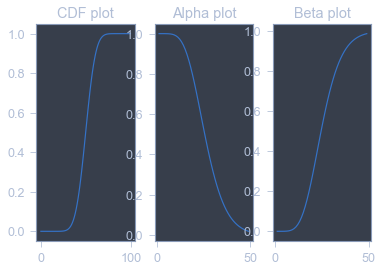

In [3]:
n = 100
x0 = 50
alpha0 = 25
beta0 = 25

xs = range(100)

alphas = range(1, 50)
betas = range(1, 50)


Ps = []
for x in xs:
#     print(x)
    P = beta_binomial_cdf(x, alpha0, beta0, n)
    Ps.append(P)
plt.subplot(1,3,1)
plt.plot(xs, Ps)
plt.title("CDF plot")


Ps = []
for a in alphas:
    Ps.append(beta_binomial_cdf(x0, a, beta0, n))

plt.subplot(1,3,2)
plt.plot(alphas, Ps)
plt.title("Alpha plot")

Ps = []
for b in betas:
    Ps.append(beta_binomial_cdf(x0, alpha0, b, n))

plt.subplot(1,3,3)
plt.plot(betas, Ps)
plt.title("Beta plot")

Text(0.5, 1.0, 'Beta plot')

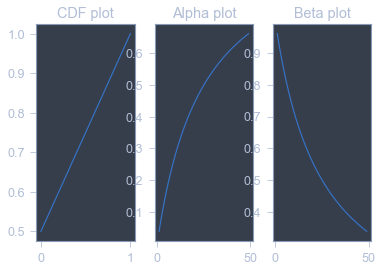

In [4]:
# set this so it should be a bernoulli distribution
n = 1
x0 = 0
alpha0 = 25
beta0 = 25

xs = range(2)

alphas = range(1, 50)
betas = range(1, 50)


Ps = []
for x in xs:
    P = beta_binomial_cdf(x, alpha0, beta0, n)
    Ps.append(P)
plt.subplot(1,3,1)
plt.plot(xs, Ps)
plt.title("CDF plot")


Ps = []
for alpha in alphas:
    Ps.append(1-beta_binomial_cdf(x0, alpha, beta0, n))

plt.subplot(1,3,2)
plt.plot(alphas, Ps)
plt.title("Alpha plot")

Ps = []
for beta in betas:
    Ps.append(1-beta_binomial_cdf(x0, alpha0, beta, n))

plt.subplot(1,3,3)
plt.plot(betas, Ps)
plt.title("Beta plot")

# Plot single draw

In [5]:
def sensitivity_plot(fun, params, *args, **kwags):
    """
    Make a sensitivity plot for distribution for different params specifies in params,
    for a specific function rest of args and kwargs are passed to function via args and kwargs
    """
    assert isinstance(params, dict)
    ncol = 2
    nplots = len(params)
    nrow = ceil(nplots/ncol)
    
    
    for i, key in enumerate(params.keys()):
        l = len(params[key])
        new_kwargs = deepcopy(kwargs)

        Ps = []
        for val in params[key]:
            new_kwargs[key] = val
            # print(args, new_kwargs)
            Ps.append(fun(*args, **new_kwargs))
            
        plt.subplot(nrow, ncol, i+1)
        plt.plot(params[key], Ps)
        plt.title(f"{key} plot for {fun}")

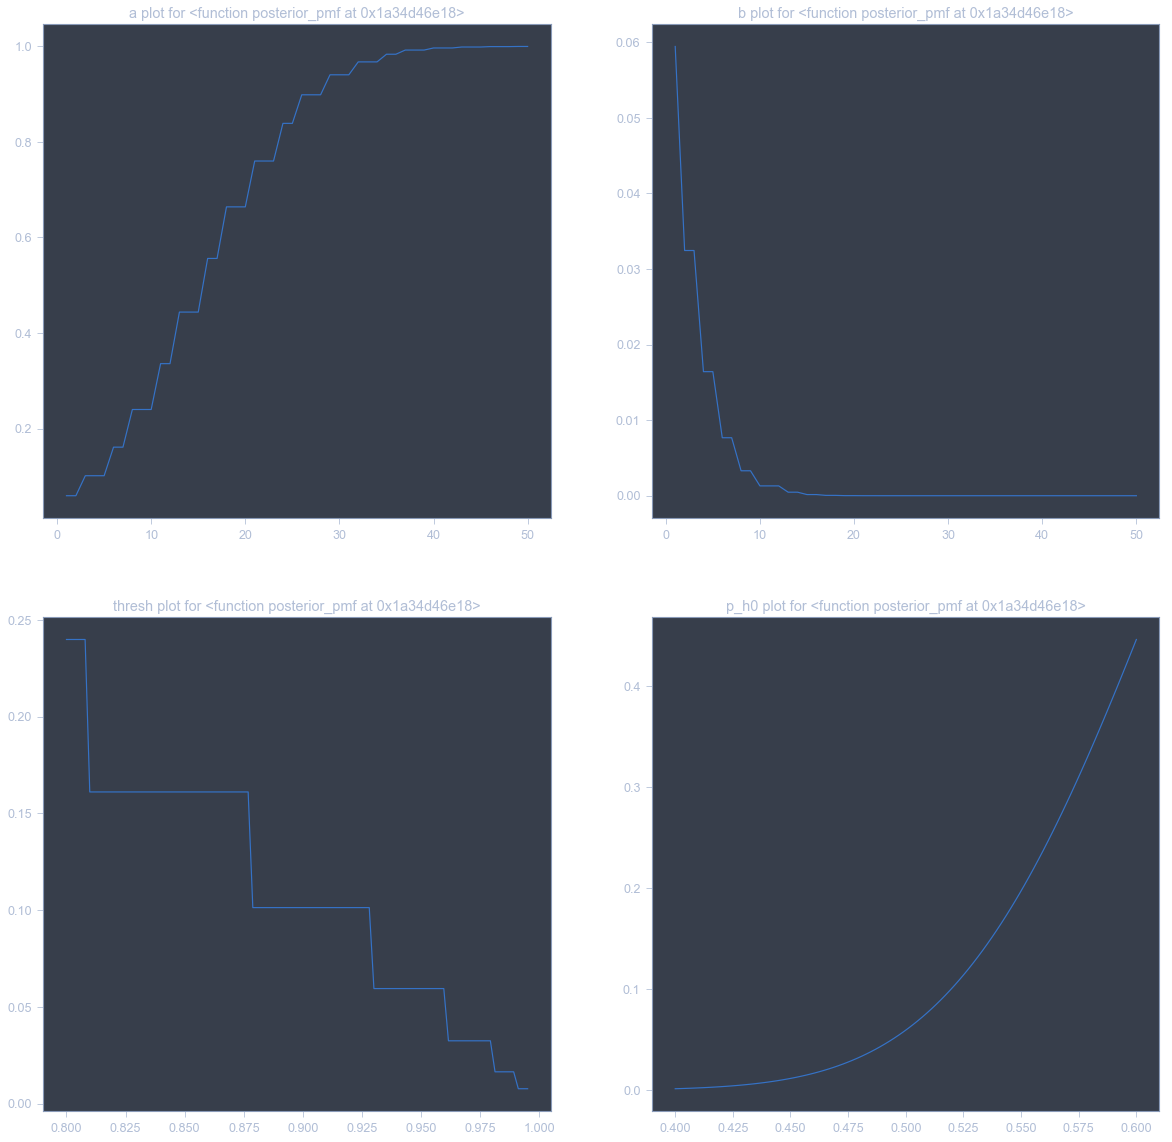

In [6]:
plt.figure(figsize=[20, 20])

# The default arguments
kwargs = {}
kwargs["s"] = 50
kwargs["n"] = 500
kwargs["a"] = 1
kwargs["b"] = 1
kwargs["thresh"] = 0.95
kwargs["verbose"] = False

params = {}
params["a"] = range(1, kwargs["s"]+1)
params["b"] = range(1, kwargs["s"]+1)
params["thresh"] = np.linspace(0.8, 0.995, 100)
params["p_h0"] = np.linspace(0.4, 0.6, 100)

sensitivity_plot(posterior_pmf, params, **kwargs)

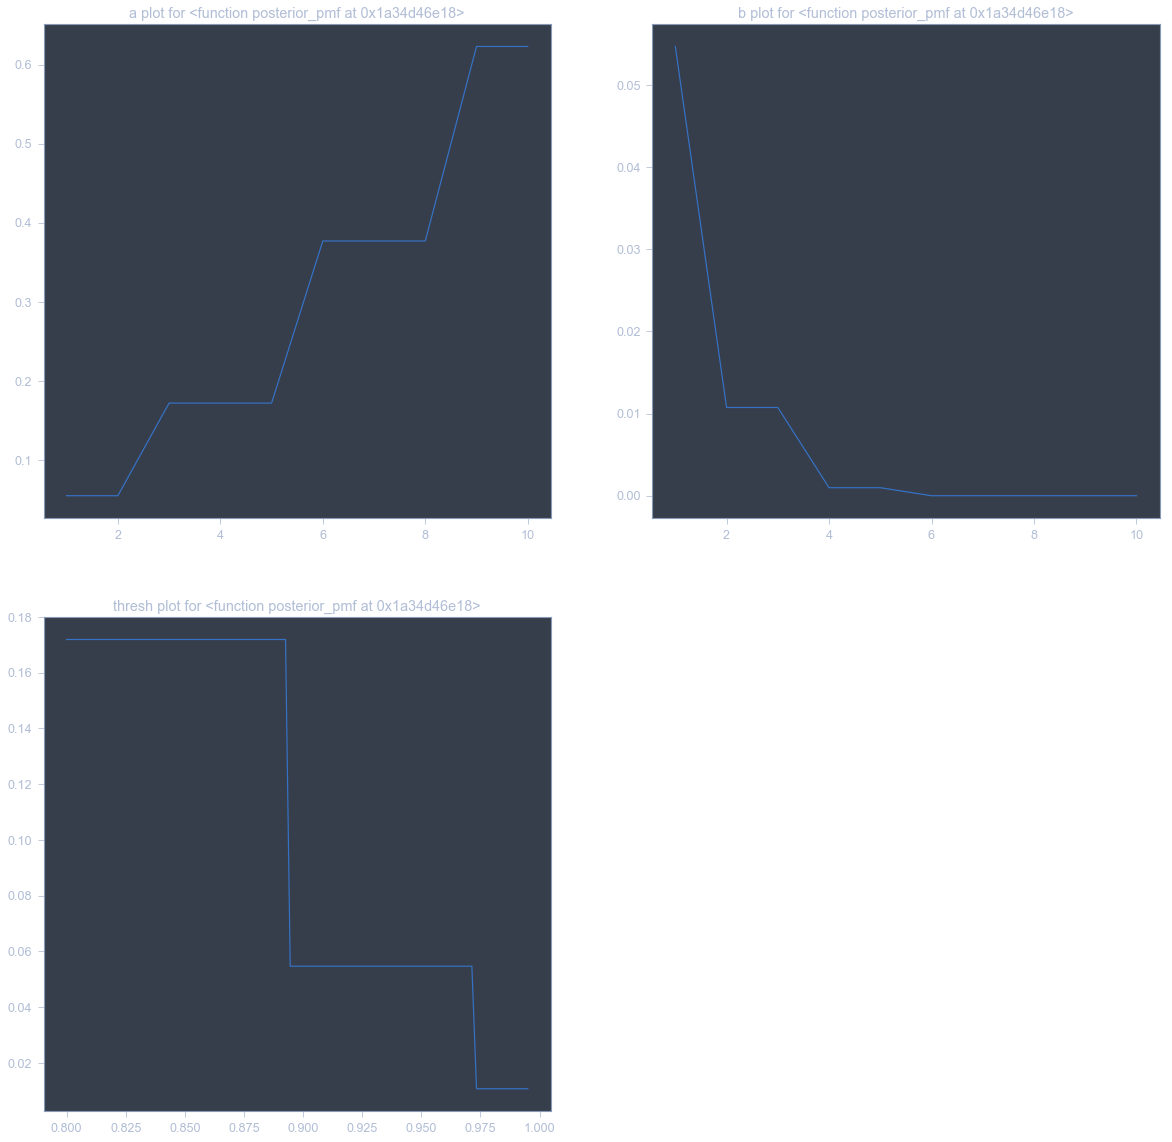

In [7]:
plt.figure(figsize=[20, 20])

# The default arguments
kwargs = {}
kwargs["s"] = 10
kwargs["n"] = 100
kwargs["a"] = 1
kwargs["b"] = 1
kwargs["thresh"] = 0.95
kwargs["verbose"] = False

params = {}
params["a"] = range(1, kwargs["s"]+1)
params["b"] = range(1, kwargs["s"]+1)
params["thresh"] = np.linspace(0.8, 0.995, 100)

sensitivity_plot(posterior_pmf, params, **kwargs)